# **1. Import Required Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load Data**

In [6]:
df = pd.read_csv('career_pred.csv')
df.head()

,Academic percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Academic percentage in Operating Systems  20000 non-null  int64 
 1   Percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical Quotient rating                   2000

In [8]:
del df['Salary Range Expected'] 
del df['Salary/work']

In [9]:
print('The shape of our training set: %s professionals and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 20000 professionals and 37 features


# **3. Data Preprocessing**

In [10]:
print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['Academic percentage in Operating Systems', 'Percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical Quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'In a Realtionsh

In [11]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Academic percentage in Operating Systems', 'Percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical Quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']


List of Categorical features: 
 ['can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'interested in games', 'Interested Type of Books', 'In a Realtionship?', 'Gentle or Tuff behaviour?', 'Management or Technical', 'h

**(1) Checking missing values**

In [12]:
df.isnull().sum(axis=0)

Academic percentage in Operating Systems    0
Percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical Quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

**Observation:** *no missing values*

**(2) Checking Distinct Values for Categorical Features**

In [13]:
categorical_col = df[['can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'interested in games', 'Interested Type of Books', 'In a Realtionship?', 'Gentle or Tuff behaviour?', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']]
for i in categorical_col: 
  print(df[i].value_counts())

can work long time before system?
yes    10020
no      9980
Name: count, dtype: int64
self-learning capability?
yes    10102
no      9898
Name: count, dtype: int64
Extra-courses did
no     10049
yes     9951
Name: count, dtype: int64
certifications
r programming           2275
machine learning        2255
shell programming       2252
information security    2250
full stack              2239
hadoop                  2210
python                  2198
app development         2165
distro making           2156
Name: count, dtype: int64
workshops
web technologies     2586
data science         2551
game development     2522
database security    2517
system designing     2516
hacking              2473
testing              2444
cloud computing      2391
Name: count, dtype: int64
talenttests taken?
yes    10047
no      9953
Name: count, dtype: int64
olympiads
yes    10079
no      9921
Name: count, dtype: int64
reading and writing skills
excellent    6696
poor         6683
medium       6621
Name: 

**Observations:** *The categorical features with yes or no can be made numerical easily using binary encoding.*


**(3) Checking Data Balancing for Classification**

<Axes: xlabel='Suggested Job Role', ylabel='count'>

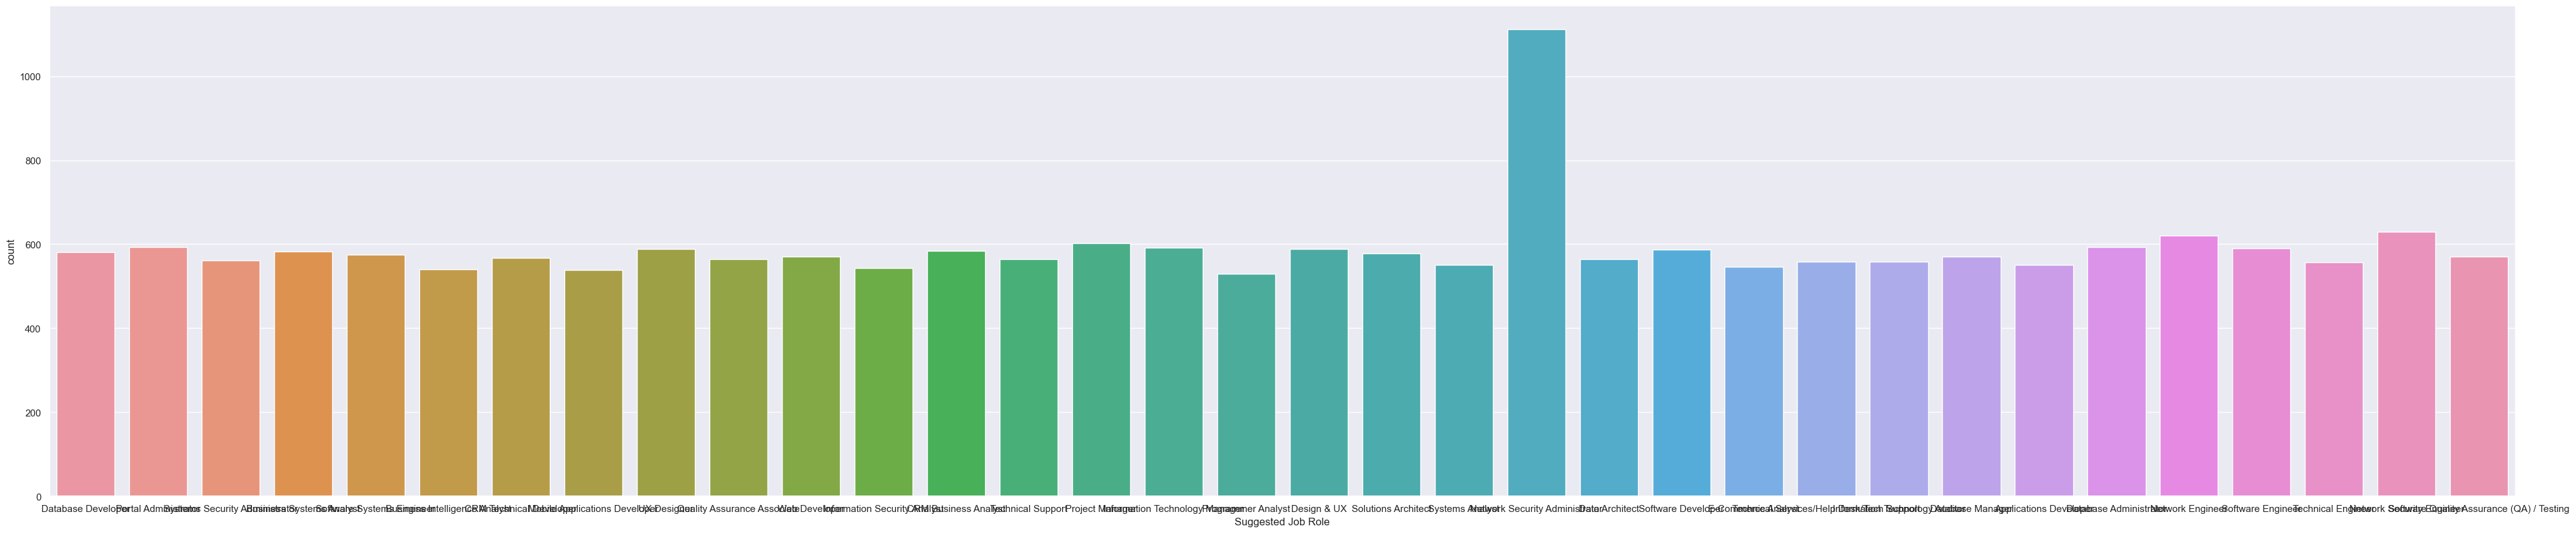

In [14]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested Job Role"])

**Observation:** *Got Imbalanced data*

(3.1) Performing Random Over-Sampling

In [16]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('Suggested Job Role', axis=1) 
Y = df['Suggested Job Role'] 

# Resample the minority class using RandomOverSampler 
oversample = RandomOverSampler() 
X_resampled, y_resampled = oversample.fit_resample(X, Y) 

df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1) 
df_balanced.columns = df.columns  

df_balanced.to_csv('balanced_Data.csv', index=False) 

In [17]:
df_balanced.head()

,Academic percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Taken inputs from seniors or elders,interested in games,Interested Type of Books,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,no,no,Prayer books,no,stubborn,Management,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,yes,yes,Childrens,yes,gentle,Technical,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,yes,yes,Travel,no,stubborn,Management,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,no,no,Romance,yes,gentle,Management,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,no,yes,Cookbooks,no,stubborn,Management,hard worker,yes,yes,Business Systems Analyst


**(3.2) Again Checking Data Balancing for Classification**

<Axes: xlabel='Suggested Job Role', ylabel='count'>

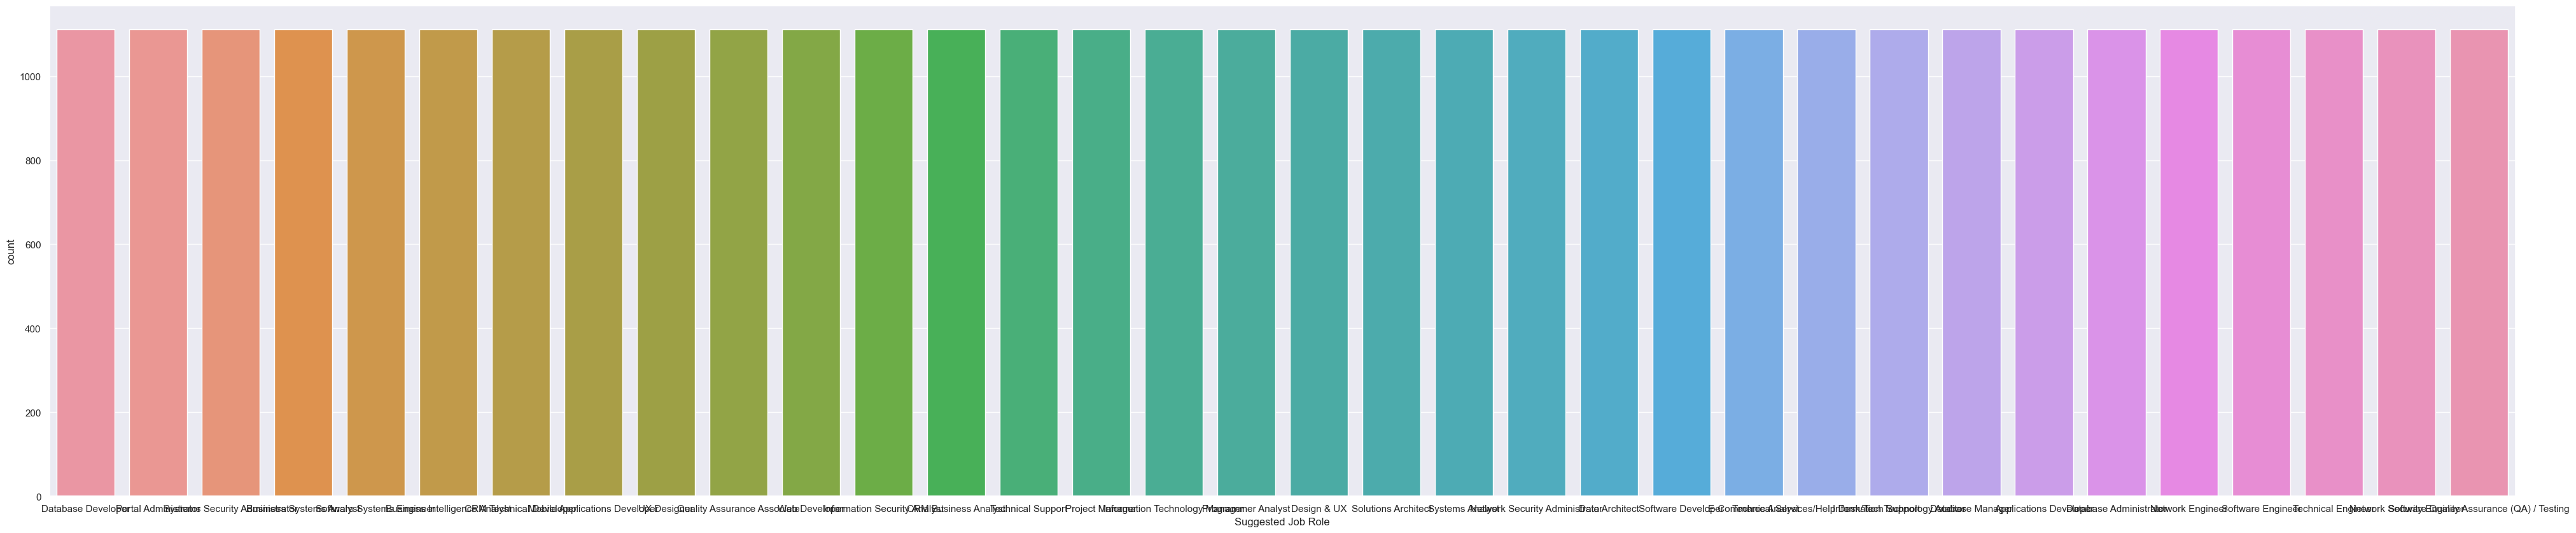

In [18]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df_balanced["Suggested Job Role"])

**(4) Normalizing numeric data**

In [19]:
from sklearn.preprocessing import Normalizer
data = df_balanced.iloc[:,:].values
data1 = data[:,:14]
normalized_data = Normalizer().fit_transform(data1) 

data2 = data[:,14:]
df1 = np.append(normalized_data,data2,axis=1)

In [20]:
dataset = pd.DataFrame(df1,columns=df_balanced.columns)
dataset.head()

,Academic percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Taken inputs from seniors or elders,interested in games,Interested Type of Books,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,0.28509,0.260299,0.322276,0.359461,0.388383,0.388383,0.359461,0.347066,0.252036,0.037186,...,no,no,Prayer books,no,stubborn,Management,hard worker,yes,no,Database Developer
1,0.34998,0.278189,0.327545,0.269215,0.318571,0.314085,0.327545,0.376901,0.40831,0.053843,...,yes,yes,Childrens,yes,gentle,Technical,hard worker,no,yes,Portal Administrator
2,0.295012,0.357339,0.378115,0.361494,0.253461,0.336563,0.299168,0.299168,0.39058,0.045706,...,yes,yes,Travel,no,stubborn,Management,hard worker,no,yes,Portal Administrator
3,0.328025,0.375503,0.258967,0.362554,0.384135,0.315077,0.2676,0.379819,0.297812,0.030213,...,no,no,Romance,yes,gentle,Management,smart worker,yes,yes,Systems Security Administrator
4,0.397157,0.267649,0.388523,0.289234,0.306502,0.384206,0.315136,0.306502,0.315136,0.017268,...,no,yes,Cookbooks,no,stubborn,Management,hard worker,yes,yes,Business Systems Analyst


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Academic percentage in Operating Systems  37808 non-null  object
 1   Percentage in Algorithms                  37808 non-null  object
 2   Percentage in Programming Concepts        37808 non-null  object
 3   Percentage in Software Engineering        37808 non-null  object
 4   Percentage in Computer Networks           37808 non-null  object
 5   Percentage in Electronics Subjects        37808 non-null  object
 6   Percentage in Computer Architecture       37808 non-null  object
 7   Percentage in Mathematics                 37808 non-null  object
 8   Percentage in Communication skills        37808 non-null  object
 9   Hours working per day                     37808 non-null  object
 10  Logical Quotient rating                   3780

In [22]:
for i in dataset.columns[0:14]: 
  dataset[i] = dataset[i].astype('float64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Academic percentage in Operating Systems  37808 non-null  float64
 1   Percentage in Algorithms                  37808 non-null  float64
 2   Percentage in Programming Concepts        37808 non-null  float64
 3   Percentage in Software Engineering        37808 non-null  float64
 4   Percentage in Computer Networks           37808 non-null  float64
 5   Percentage in Electronics Subjects        37808 non-null  float64
 6   Percentage in Computer Architecture       37808 non-null  float64
 7   Percentage in Mathematics                 37808 non-null  float64
 8   Percentage in Communication skills        37808 non-null  float64
 9   Hours working per day                     37808 non-null  float64
 10  Logical Quotient rating           

# **4. Exploratory Data Analysis**

**(1) Correlation between Numeric Features other than percentage columns**

<Axes: >

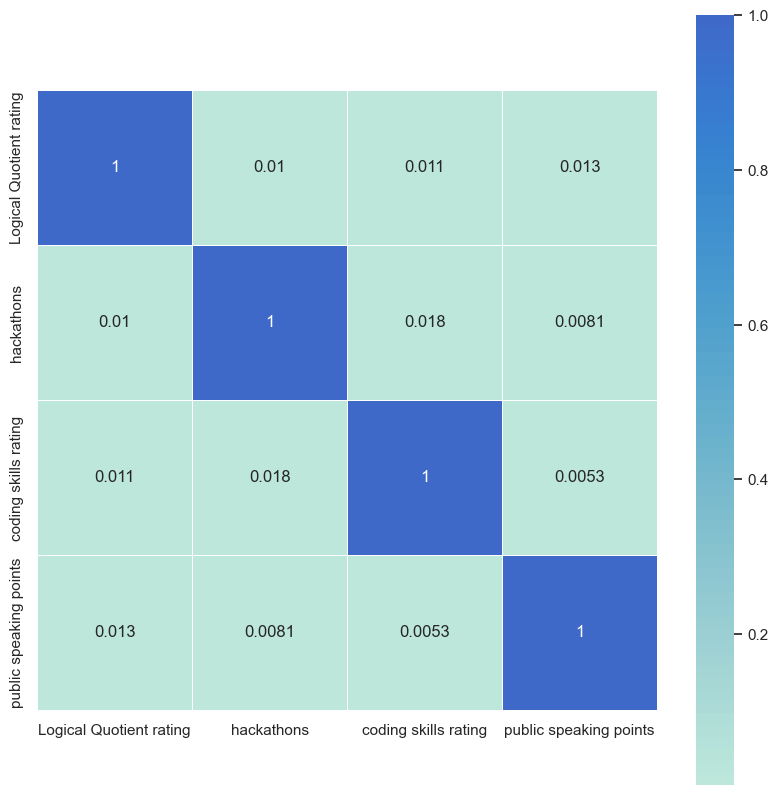

In [24]:
corr = dataset[['Logical Quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']].corr()

f, axes = plt.subplots(1,1, figsize=(10, 10)) 
sns.heatmap(corr, square=True, annot=True, linewidth=.4, center=2, ax=axes)

**Observation:** *No highly corelated numerical pair found.*

**(2) Visualization for Categorical Variables**

In [25]:
print(dataset["Interested subjects"].value_counts())

Interested subjects
networks                 3942
programming              3911
IOT                      3909
data engineering         3805
Computer Architecture    3764
cloud computing          3752
hacking                  3699
Software Engineering     3689
Management               3673
parallel computing       3664
Name: count, dtype: int64


<Axes: xlabel='Interested subjects', ylabel='count'>

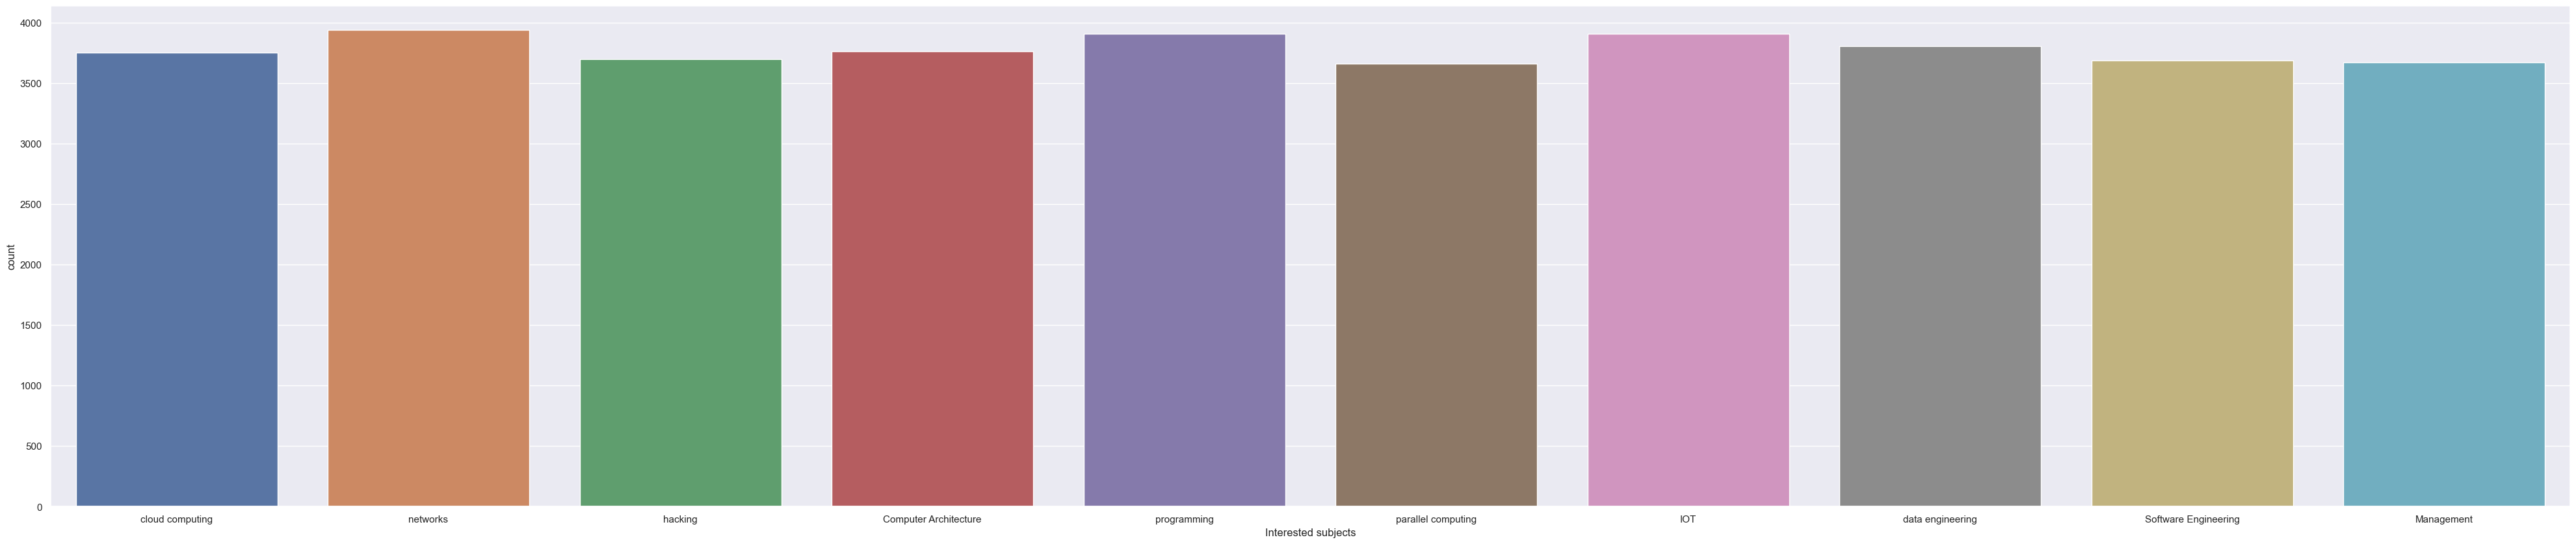

In [26]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["Interested subjects"])

<Axes: xlabel='Interested Type of Books', ylabel='count'>

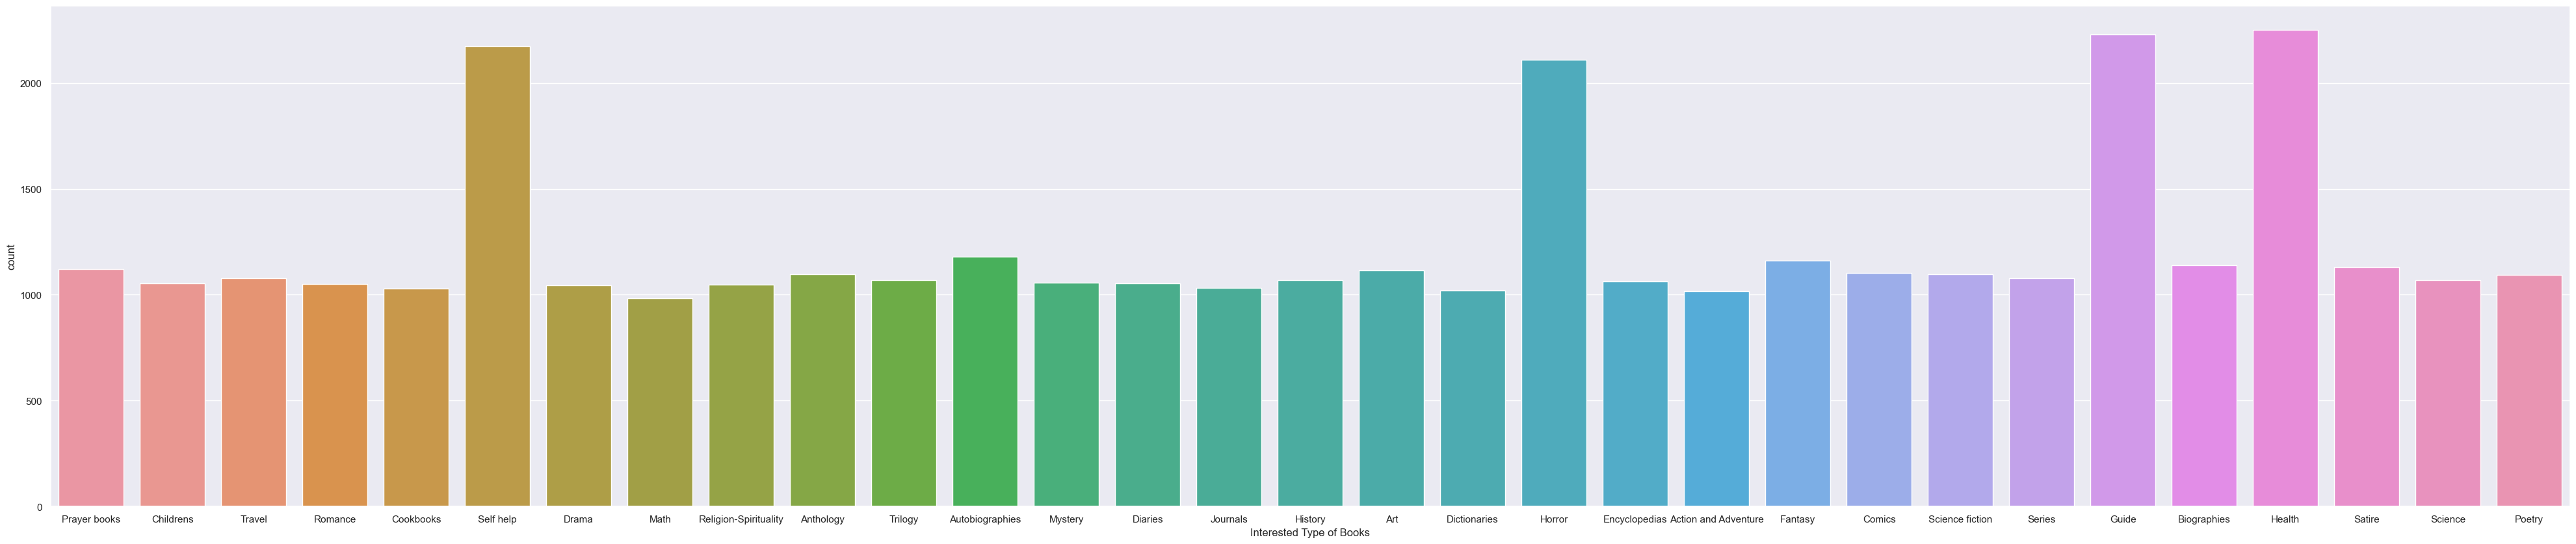

In [27]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["Interested Type of Books"])

<Axes: xlabel='certifications', ylabel='count'>

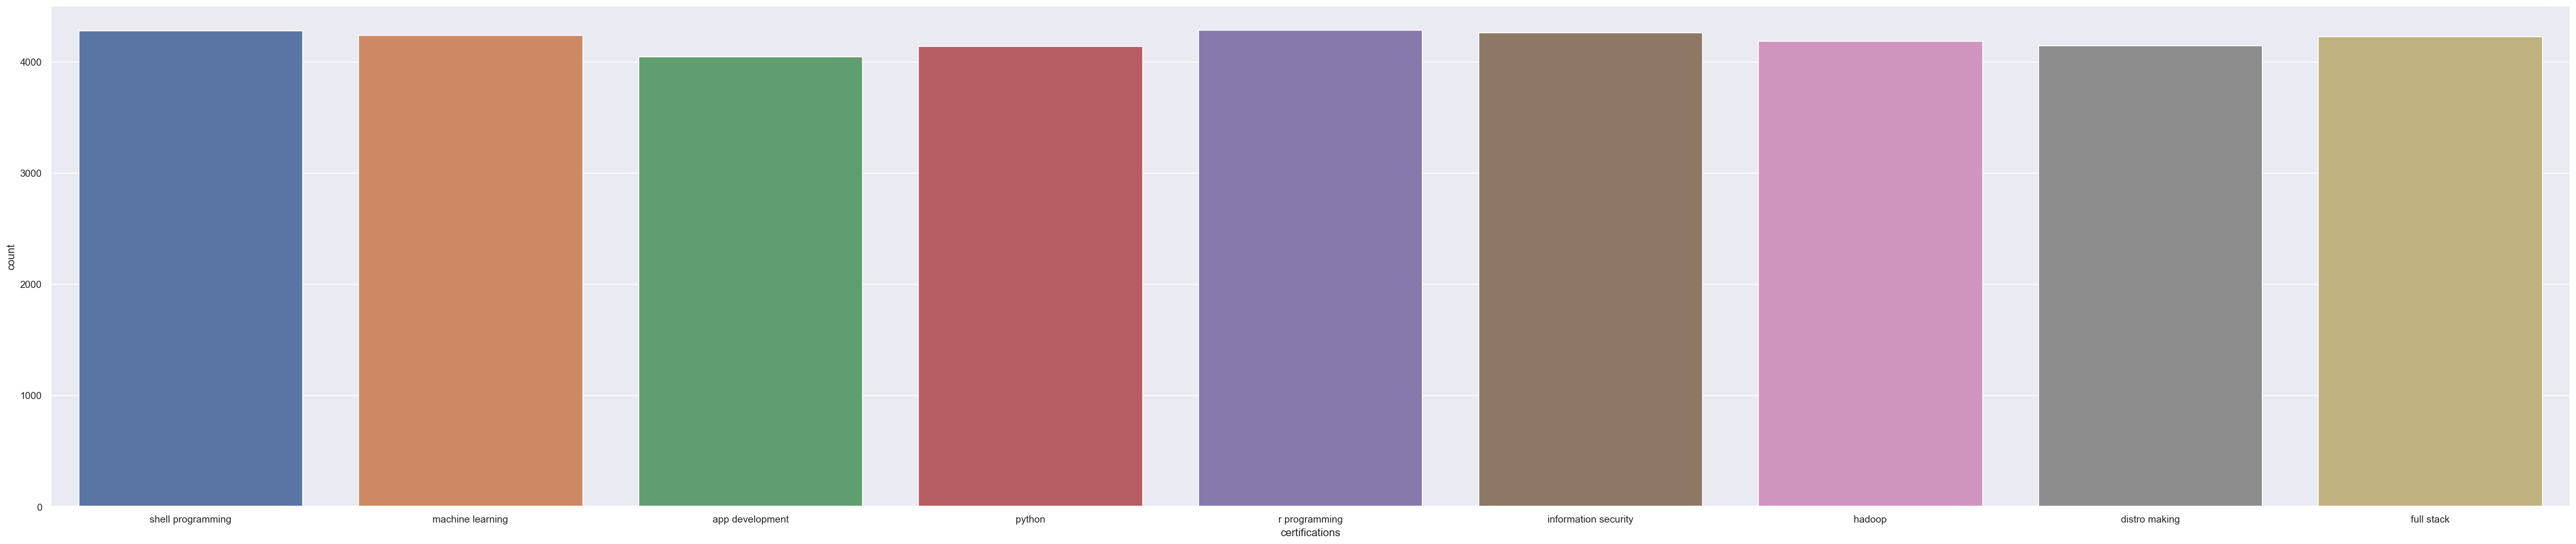

In [28]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["certifications"])

<Axes: xlabel='workshops', ylabel='count'>

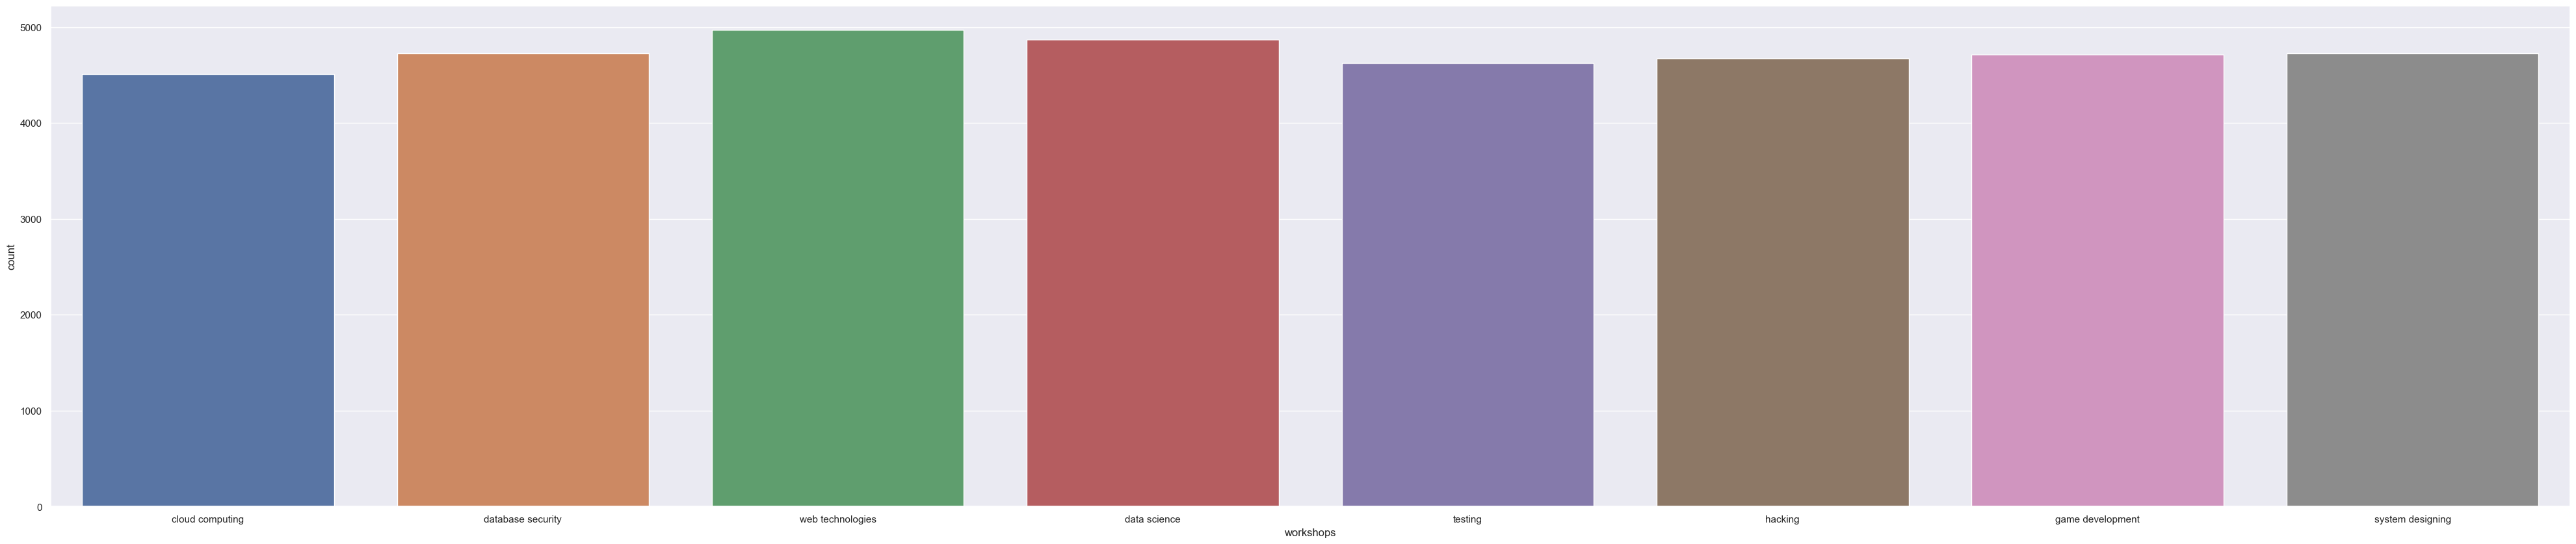

In [29]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["workshops"])

<Axes: xlabel='Type of company want to settle in?', ylabel='count'>

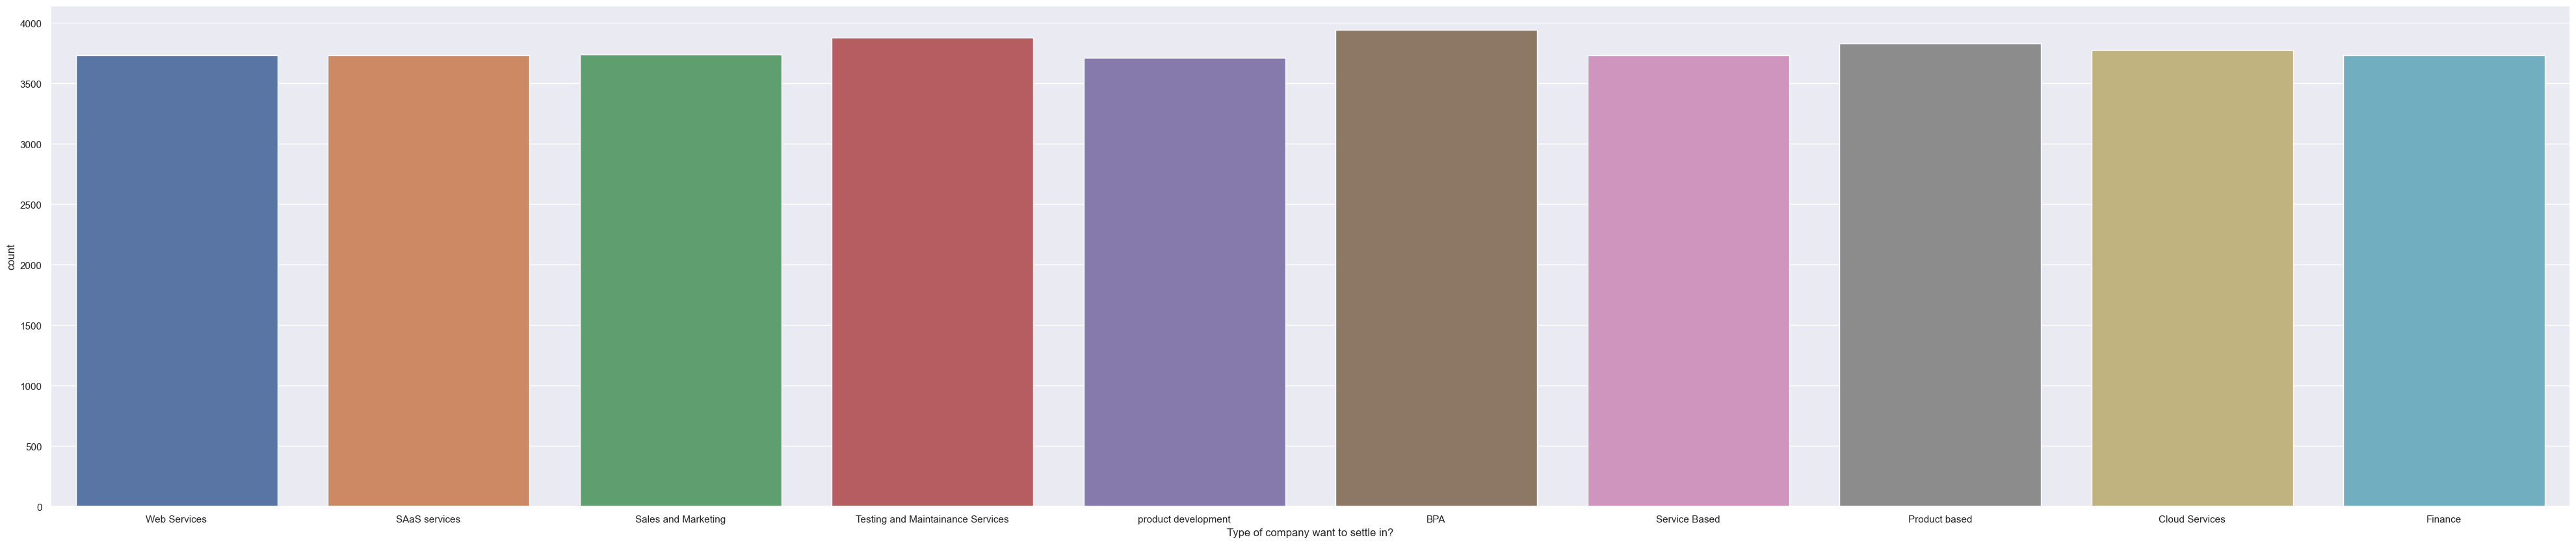

In [30]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["Type of company want to settle in?"])

<Axes: xlabel='interested career area ', ylabel='count'>

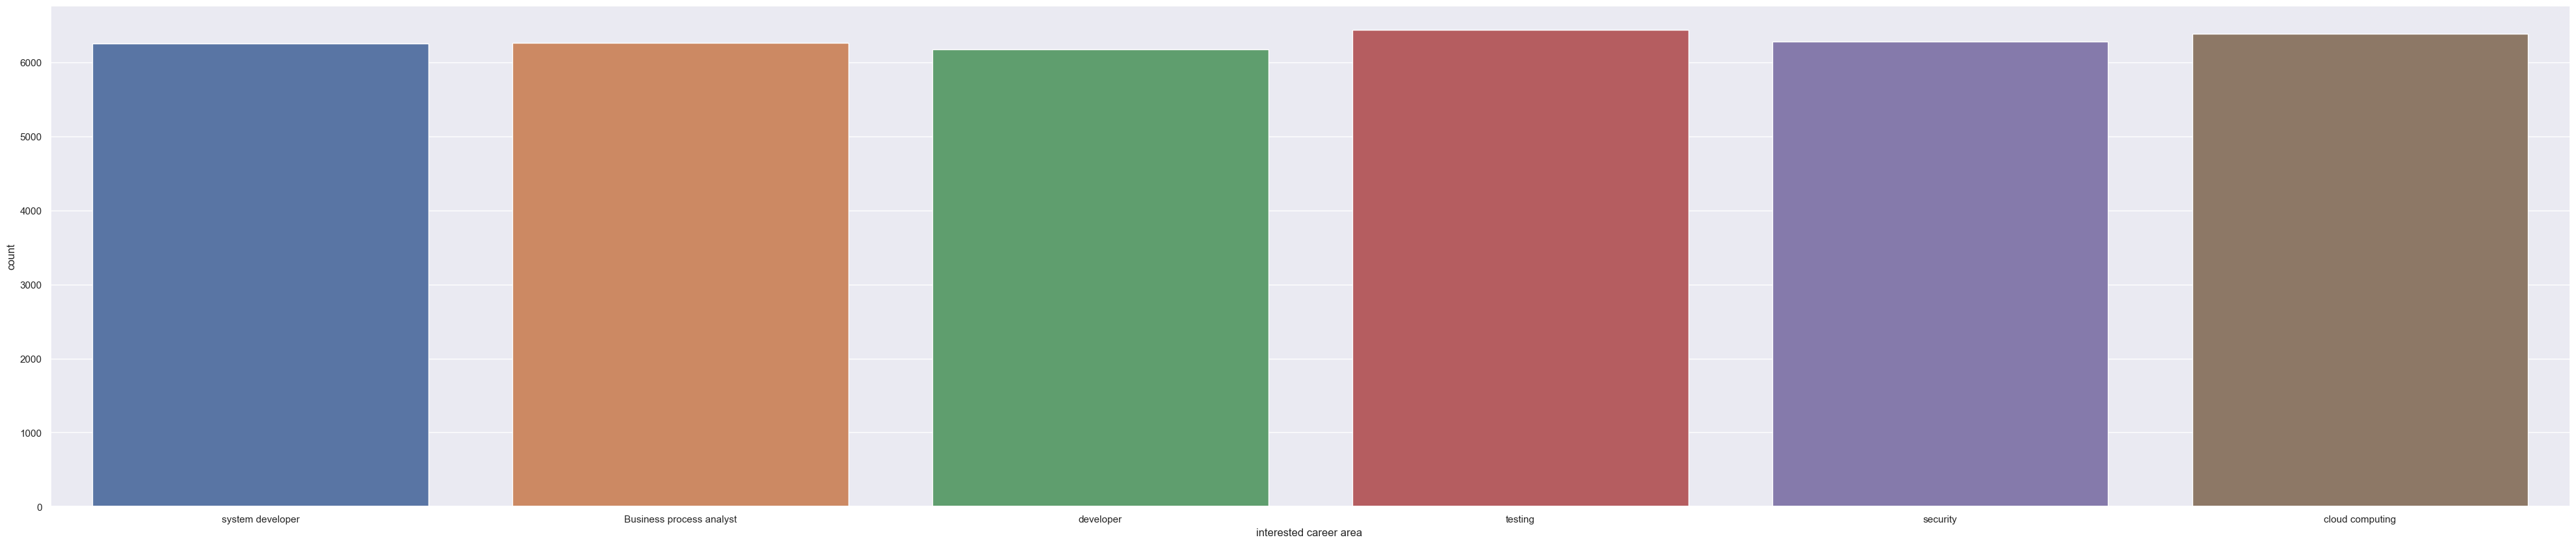

In [31]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["interested career area "])

# **5. Feature Engineering**

**(1) Binary Encoding for Categorical Variables**

In [32]:
cols = dataset[["can work long time before system?", "self-learning capability?", "Extra-courses did", "talenttests taken?", "olympiads", "Taken inputs from seniors or elders", "interested in games", "In a Realtionship?", "worked in teams ever?", "Introvert"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    dataset = dataset.replace(cleanup_nums)

In [33]:
print("\n\nList of Categorical features: \n" , dataset.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Interested Type of Books', 'Gentle or Tuff behaviour?', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [34]:
mycol = dataset[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    dataset = dataset.replace(cleanup_nums)

In [35]:
category_cols = dataset[['certifications', 'workshops','Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books']] 
for i in category_cols:
    dataset[i] = dataset[i].astype('category') 
    dataset[i + "_code"] = dataset[i].cat.codes 
    cat_mapping = dict(enumerate(dataset[i].cat.categories)) 
    print(cat_mapping) 
    del dataset[i]

{0: 'app development', 1: 'distro making', 2: 'full stack', 3: 'hadoop', 4: 'information security', 5: 'machine learning', 6: 'python', 7: 'r programming', 8: 'shell programming'}
{0: 'cloud computing', 1: 'data science', 2: 'database security', 3: 'game development', 4: 'hacking', 5: 'system designing', 6: 'testing', 7: 'web technologies'}
{0: 'Computer Architecture', 1: 'IOT', 2: 'Management', 3: 'Software Engineering', 4: 'cloud computing', 5: 'data engineering', 6: 'hacking', 7: 'networks', 8: 'parallel computing', 9: 'programming'}
{0: 'Business process analyst', 1: 'cloud computing', 2: 'developer', 3: 'security', 4: 'system developer', 5: 'testing'}
{0: 'BPA', 1: 'Cloud Services', 2: 'Finance', 3: 'Product based', 4: 'SAaS services', 5: 'Sales and Marketing', 6: 'Service Based', 7: 'Testing and Maintainance Services', 8: 'Web Services', 9: 'product development'}
{0: 'Action and Adventure', 1: 'Anthology', 2: 'Art', 3: 'Autobiographies', 4: 'Biographies', 5: 'Childrens', 6: 'Comi

In [36]:
print("\n\nList of Categorical features: \n" , dataset.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Job/Higher Studies?', 'Gentle or Tuff behaviour?', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Academic percentage in Operating Systems  37808 non-null  float64
 1   Percentage in Algorithms                  37808 non-null  float64
 2   Percentage in Programming Concepts        37808 non-null  float64
 3   Percentage in Software Engineering        37808 non-null  float64
 4   Percentage in Computer Networks           37808 non-null  float64
 5   Percentage in Electronics Subjects        37808 non-null  float64
 6   Percentage in Computer Architecture       37808 non-null  float64
 7   Percentage in Mathematics                 37808 non-null  float64
 8   Percentage in Communication skills        37808 non-null  float64
 9   Hours working per day                     37808 non-null  float64
 10  Logical Quotient rating           

In [38]:
dataset = pd.get_dummies(dataset, columns=['Job/Higher Studies?', 'Gentle or Tuff behaviour?', "Management or Technical", "hard/smart worker"], prefix=["A", "B", "C", "D"])
dataset.head()

,Academic percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Type of company want to settle in?_code,Interested Type of Books_code,A_higherstudies,A_job,B_gentle,B_stubborn,C_Management,C_Technical,D_hard worker,D_smart worker
0,0.285090,0.260299,0.322276,0.359461,0.388383,0.388383,0.359461,0.347066,0.252036,0.037186,...,8,21,True,False,False,True,True,False,True,False
1,0.349980,0.278189,0.327545,0.269215,0.318571,0.314085,0.327545,0.376901,0.408310,0.053843,...,4,5,False,True,True,False,False,True,True,False
2,0.295012,0.357339,0.378115,0.361494,0.253461,0.336563,0.299168,0.299168,0.390580,0.045706,...,5,29,True,False,False,True,True,False,True,False
3,0.328025,0.375503,0.258967,0.362554,0.384135,0.315077,0.267600,0.379819,0.297812,0.030213,...,7,23,True,False,True,False,True,False,False,True
4,0.397157,0.267649,0.388523,0.289234,0.306502,0.384206,0.315136,0.306502,0.315136,0.017268,...,9,7,True,False,False,True,True,False,True,False


In [39]:
print("List of Numerical features: \n" , dataset.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Academic percentage in Operating Systems', 'Percentage in Algorithms', 'Percentage in Programming Concepts', 'Percentage in Software Engineering', 'Percentage in Computer Networks', 'Percentage in Electronics Subjects', 'Percentage in Computer Architecture', 'Percentage in Mathematics', 'Percentage in Communication skills', 'Hours working per day', 'Logical Quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Taken inputs from seniors or elders', 'interested in games', 'In a Realtionship?', 'worked in teams ever?', 'Introvert', 'certifications_code', 'workshops_code', 'Interested subjects_code', 'interested career area _code', 'Type of company want to settle in?_code', 'Interested Type of Books_code']


# **6. Building Machine Learning Model**

In [40]:
dataset.head()

,Academic percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Type of company want to settle in?_code,Interested Type of Books_code,A_higherstudies,A_job,B_gentle,B_stubborn,C_Management,C_Technical,D_hard worker,D_smart worker
0,0.285090,0.260299,0.322276,0.359461,0.388383,0.388383,0.359461,0.347066,0.252036,0.037186,...,8,21,True,False,False,True,True,False,True,False
1,0.349980,0.278189,0.327545,0.269215,0.318571,0.314085,0.327545,0.376901,0.408310,0.053843,...,4,5,False,True,True,False,False,True,True,False
2,0.295012,0.357339,0.378115,0.361494,0.253461,0.336563,0.299168,0.299168,0.390580,0.045706,...,5,29,True,False,False,True,True,False,True,False
3,0.328025,0.375503,0.258967,0.362554,0.384135,0.315077,0.267600,0.379819,0.297812,0.030213,...,7,23,True,False,True,False,True,False,False,True
4,0.397157,0.267649,0.388523,0.289234,0.306502,0.384206,0.315136,0.306502,0.315136,0.017268,...,9,7,True,False,False,True,True,False,True,False


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 41 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Academic percentage in Operating Systems  37808 non-null  float64
 1   Percentage in Algorithms                  37808 non-null  float64
 2   Percentage in Programming Concepts        37808 non-null  float64
 3   Percentage in Software Engineering        37808 non-null  float64
 4   Percentage in Computer Networks           37808 non-null  float64
 5   Percentage in Electronics Subjects        37808 non-null  float64
 6   Percentage in Computer Architecture       37808 non-null  float64
 7   Percentage in Mathematics                 37808 non-null  float64
 8   Percentage in Communication skills        37808 non-null  float64
 9   Hours working per day                     37808 non-null  float64
 10  Logical Quotient rating           

In [42]:
df_train_x = dataset.drop('Suggested Job Role', axis=1) 
df_train_y = dataset['Suggested Job Role']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.2, random_state=41)

In [44]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [57:36<00:00, 119.18s/it]  

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score   
Model                                                                          
ExtraTreesClassifier               0.71               0.71    None      0.71  \
LabelPropagation                   0.71               0.71    None      0.70   
DecisionTreeClassifier             0.71               0.71    None      0.70   
BaggingClassifier                  0.71               0.71    None      0.71   
RandomForestClassifier             0.71               0.71    None      0.71   
ExtraTreeClassifier                0.71               0.71    None      0.70   
LGBMClassifier                     0.70               0.70    None      0.70   
NuSVC                              0.59               0.59    None      0.59   
SVC                                0.36               0.36    None      0.36   
KNeighborsClassifier               0.26               0.26    None      0.25   
QuadraticDiscriminantAnalysis      0.12 

**Decision Tree Classifier**

In [45]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [47]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*100)

confusion matrics= [[157   4   1 ...   0   2   0]
 [  1 166   2 ...   1   1   1]
 [  1   1 162 ...   1   0   3]
 ...
 [  0   2   0 ... 173   2   3]
 [  2   0   1 ...   2 155   2]
 [  2   0   0 ...   8   2 180]]
  
accuracy= 70.66913514943137


In [48]:
import pickle
filename = 'decision_tree_model.pkl'
pickle.dump(dtree, open(filename, 'wb'))
